In [921]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [922]:
emissions = pd.read_csv('emissions.csv')

In [923]:
grouped_emissions_data = emissions.groupby('parent_entity')['total_emissions_MtCO2e'].sum().reset_index()
emissions_by_entities = grouped_emissions_data.sort_values(by='total_emissions_MtCO2e', ascending=False).head(10)

parent_entities_color = ['#9b2915'] + ['#e9b44c'] * (len(emissions_by_entities) - 1)

In [924]:
relevant_emissions = emissions[['parent_entity', 'total_emissions_MtCO2e', 'commodity', 'year']].copy()
china_emissions = relevant_emissions[relevant_emissions['parent_entity'] == 'China (Coal)']
china_bituminous_emissions = china_emissions[china_emissions['commodity'] == 'Bituminous Coal']
china_metallurgical_emissions = china_emissions[china_emissions['commodity'] == 'Metallurgical Coal']
china_anthracite_emissions = china_emissions[china_emissions['commodity'] == 'Anthracite Coal']
china_lignite_emissions = china_emissions[china_emissions['commodity'] == 'Lignite Coal']

background_color = '#E4D6A7'
bituminous_color = '#9b2915'
metallurgical_color = '#e9b44c'
anthracite_color = '#1c110a'
lignite_color = '#50a2a7'
text_color = '#252525'

def space_format(x, pos):
    return '{:,.0f}'.format(x).replace(',', ' ')

def comma_format(x, pos):
    return '{:,.0f}'.format(x)

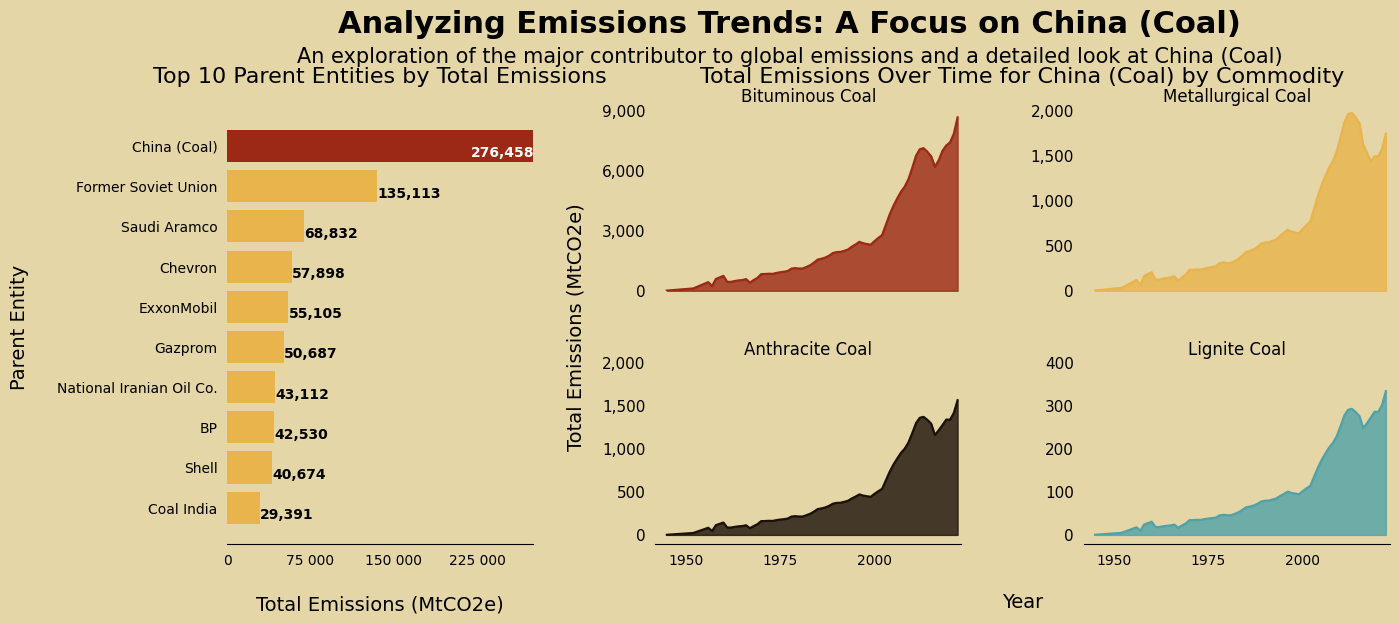

In [925]:
main_figure = plt.figure(figsize=(15, 6), constrained_layout=True)
main_figure.suptitle('Analyzing Emissions Trends: A Focus on China (Coal)', fontsize=22, fontweight='bold')
main_figure.set_facecolor(background_color)
#main_figure.subplots_adjust(0.2, 0.4, 0.21, 0.85, 0.2, 0.5)
content_figure = main_figure.subfigures()
content_figure.suptitle('An exploration of the major contributor to global emissions and a detailed look at China (Coal)', fontsize=15)

grid_spec = GridSpec(2, 3, wspace=0.4, hspace=0.4) 

# setup parent entities plot
parent_entities_plot = content_figure.add_subplot(grid_spec[:, 0])
title_pad = 20
parent_entities_plot.set_title('Top 10 Parent Entities by Total Emissions', pad=title_pad, fontsize=16, fontweight='normal')
parent_entities_plot.set_xlabel('Total Emissions (MtCO2e)', labelpad=20, fontsize=14, fontweight='normal')
parent_entities_plot.set_ylabel('Parent Entity', labelpad=20, fontsize=14, fontweight='normal')
parent_entities_plot.set_facecolor(background_color)
parent_entities_plot.xaxis.set_ticks_position('none')
parent_entities_plot.yaxis.set_ticks_position('none')
parent_entities_plot.spines['left'].set_visible(False)
parent_entities_plot.spines['top'].set_visible(False)
parent_entities_plot.spines['right'].set_visible(False)
# fill and adjust data
parent_entities_plot.barh(emissions_by_entities['parent_entity'], emissions_by_entities['total_emissions_MtCO2e'], color=parent_entities_color)
for index, value in enumerate(emissions_by_entities['total_emissions_MtCO2e']):
    if (index == 0):
        parent_entities_plot.text(value, index, f'{value:,.0f}', va='top', ha='right', fontsize=10, fontweight='bold', color='white')
    else:
        parent_entities_plot.text(value, index, f'{value:,.0f}', va='top', ha='left', fontsize=10, fontweight='bold')
parent_entities_plot.invert_yaxis()
parent_entities_plot.set_xlim(0, 275000)
parent_entities_plot.xaxis.set_major_locator(plt.MultipleLocator(75000))
parent_entities_plot.xaxis.set_major_formatter(FuncFormatter(space_format))

emissions_plot = content_figure.add_subplot(grid_spec[:, 1:])
emissions_plot.set_title('Total Emissions Over Time for China (Coal) by Commodity', pad=title_pad, fontsize=16, fontweight='normal')
emissions_plot.set_xlabel('Year', labelpad=35, fontsize=14, fontweight='normal')
emissions_plot.set_ylabel('Total Emissions (MtCO2e)', labelpad=50, fontsize=14, fontweight='normal')
emissions_plot.set_facecolor(background_color)
emissions_plot.grid(False)
emissions_plot.set_xticks([])
emissions_plot.set_yticks([])
emissions_plot.spines['left'].set_visible(False)
emissions_plot.spines['top'].set_visible(False)
emissions_plot.spines['right'].set_visible(False)
emissions_plot.spines['bottom'].set_visible(False)

# setup emissions from China by commodity charts
bituminous_emissions_plot = content_figure.add_subplot(grid_spec[0, 1])
bituminous_total = china_bituminous_emissions['total_emissions_MtCO2e']
bituminous_year = china_bituminous_emissions['year']
bituminous_emissions_plot.plot(bituminous_year, bituminous_total, color=bituminous_color)
bituminous_emissions_plot.fill_between(bituminous_year, bituminous_total, color=bituminous_color, alpha=0.8)
bituminous_emissions_plot.set_title('Bituminous Coal')
bituminous_emissions_plot.set_facecolor(background_color)
bituminous_emissions_plot.xaxis.set_ticks_position('none')
bituminous_emissions_plot.yaxis.set_ticks_position('none')
bituminous_emissions_plot.tick_params(axis='y', labelsize=11)
bituminous_emissions_plot.set_xticks([])
bituminous_emissions_plot.spines['left'].set_visible(False)
bituminous_emissions_plot.spines['top'].set_visible(False)
bituminous_emissions_plot.spines['right'].set_visible(False)
bituminous_emissions_plot.spines['bottom'].set_visible(False)
bituminous_emissions_plot.set_xlim(1942, 2023)
bituminous_emissions_plot.set_ylim(0, 9000)
bituminous_emissions_plot.yaxis.set_major_locator(plt.MultipleLocator(3000))

metallurgical_emissions_plot = content_figure.add_subplot(grid_spec[0, 2])
metallurgical_total = china_metallurgical_emissions['total_emissions_MtCO2e']
metallurgical_year = china_metallurgical_emissions['year']
metallurgical_emissions_plot.plot(metallurgical_year, metallurgical_total, color=metallurgical_color)
metallurgical_emissions_plot.fill_between(metallurgical_year, metallurgical_total, color=metallurgical_color, alpha=0.8)
metallurgical_emissions_plot.set_title('Metallurgical Coal')
metallurgical_emissions_plot.set_facecolor(background_color)
metallurgical_emissions_plot.xaxis.set_ticks_position('none')
metallurgical_emissions_plot.yaxis.set_ticks_position('none')
metallurgical_emissions_plot.tick_params(axis='y', labelsize=11)
metallurgical_emissions_plot.set_xticks([])
metallurgical_emissions_plot.spines['left'].set_visible(False)
metallurgical_emissions_plot.spines['top'].set_visible(False)
metallurgical_emissions_plot.spines['right'].set_visible(False)
metallurgical_emissions_plot.spines['bottom'].set_visible(False)
metallurgical_emissions_plot.set_xlim(1942, 2023)
metallurgical_emissions_plot.set_ylim(0, 2000)
metallurgical_emissions_plot.yaxis.set_major_locator(plt.MultipleLocator(500))

anthracite_emissions_plot = content_figure.add_subplot(grid_spec[1, 1])
anthracite_total = china_anthracite_emissions['total_emissions_MtCO2e']
anthracite_year = china_anthracite_emissions['year']
anthracite_emissions_plot.plot(anthracite_year, anthracite_total, color=anthracite_color)
anthracite_emissions_plot.fill_between(anthracite_year, anthracite_total, color=anthracite_color, alpha=0.8)
anthracite_emissions_plot.set_title('Anthracite Coal')
anthracite_emissions_plot.set_facecolor(background_color)
anthracite_emissions_plot.xaxis.set_ticks_position('none')
anthracite_emissions_plot.yaxis.set_ticks_position('none')
anthracite_emissions_plot.tick_params(axis='y', labelsize=11)
anthracite_emissions_plot.spines['left'].set_visible(False)
anthracite_emissions_plot.spines['top'].set_visible(False)
anthracite_emissions_plot.spines['right'].set_visible(False)
#anthracite_emissions_plot.set_xlim(1945, 2020)
anthracite_emissions_plot.set_xlim(1942, 2023)
anthracite_emissions_plot.xaxis.set_major_locator(plt.MultipleLocator(25))
anthracite_emissions_plot.set_ylim(-100, 2000)
anthracite_emissions_plot.yaxis.set_major_locator(plt.MultipleLocator(500))

lignite_emissions_plot = content_figure.add_subplot(grid_spec[1, 2])
lignite_total = china_lignite_emissions['total_emissions_MtCO2e']
lignite_year = china_lignite_emissions['year'].astype(int)
lignite_emissions_plot.plot(lignite_year, lignite_total, color=lignite_color)
lignite_emissions_plot.fill_between(lignite_year, lignite_total, color=lignite_color, alpha=0.8)
lignite_emissions_plot.set_title('Lignite Coal')
lignite_emissions_plot.set_facecolor(background_color)
lignite_emissions_plot.xaxis.set_ticks_position('none')
lignite_emissions_plot.yaxis.set_ticks_position('none')
lignite_emissions_plot.tick_params(axis='y', labelsize=11)
lignite_emissions_plot.spines['left'].set_visible(False)
lignite_emissions_plot.spines['top'].set_visible(False)
lignite_emissions_plot.spines['right'].set_visible(False)
lignite_emissions_plot.set_xlim(1942, 2023)
lignite_emissions_plot.xaxis.set_major_locator(plt.MultipleLocator(25))
lignite_emissions_plot.set_ylim(-20, 400)
lignite_emissions_plot.yaxis.set_major_locator(plt.MultipleLocator(100))

#plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)

#main_figure.subplots_adjust(top=0.75)
#content_figure.subplots_adjust(top=0.3)

for plot in [bituminous_emissions_plot, metallurgical_emissions_plot, anthracite_emissions_plot, lignite_emissions_plot]:
    plot.yaxis.set_major_formatter(FuncFormatter(comma_format))

plt.show()